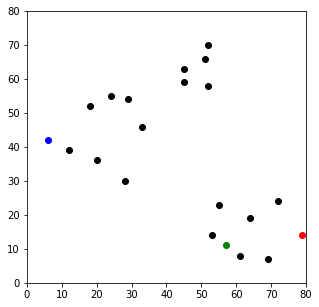

In [94]:
## Initialization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,58,23,14,8,19,7,24]
})


# The seed() method is used to initialize the random number generator. 
# The random number generator needs a number to start with (a seed value), to be able to generate a random number.

#np.random.seed(200)   # seed is the method used to initialize the pseudorandom number generator
k=3                   # initially taking 3 as k for number of clusters

# centroids[i] = [x,y]
centroids={    # choosing three random points
    i+1:[np.random.randint(0,80), np.random.randint(0,80)]   # the value of above taken numbers is till 80 max hence generating random nmbrs till 80
    for i in range(k)
}

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')   # k stands for black color
colmap={1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [75]:
colmap[1]

'r'

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        35.128336        36.055513        56.080300        1     r
1  20  36        39.560081        28.017851        48.373546        2     g
2  28  30        47.927028        21.189620        41.761226        2     g
3  18  52        23.769729        33.541020        50.990195        1     r
4  29  54        28.284271        25.495098        40.804412        2     g


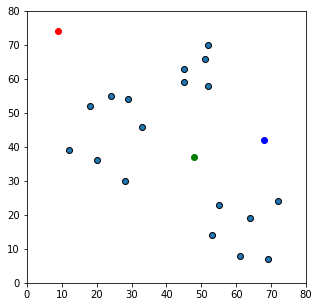

In [77]:
# Now we have to assign each point to one of the clusters
def assignment(df, centroids):
    for i in centroids.keys(): 
        # sqrt((x1 - x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x'] - centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
        
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], alpha=1, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [31]:
assignment()

TypeError: assignment() missing 2 required positional arguments: 'df' and 'centroids'

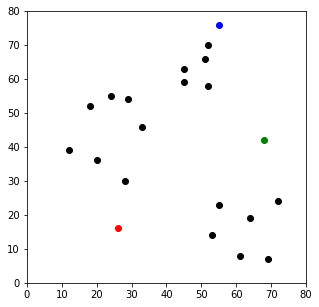

In [102]:
## Initialization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,58,23,14,8,19,7,24]
})


# The seed() method is used to initialize the random number generator. 
# The random number generator needs a number to start with (a seed value), to be able to generate a random number.

np.random.seed(200)   # seed is the method used to initialize the pseudorandom number generator
k=3                   # initially taking 3 as k for number of clusters

# centroids[i] = [x,y]
centroids={    # choosing three random points
    i+1:[np.random.randint(0,80), np.random.randint(0,80)]   # the value of above taken numbers is till 80 max hence generating random nmbrs till 80
    for i in range(k)
}

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')   # k stands for black color
colmap={1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [103]:
from sklearn.cluster import KMeans

kmean=KMeans(n_clusters=3)
kmean.fit(df)

KMeans(n_clusters=3)

In [104]:
# next we will learn the label
labels=kmean.predict(df)
cluster=kmean.cluster_centers_   # plot the labels

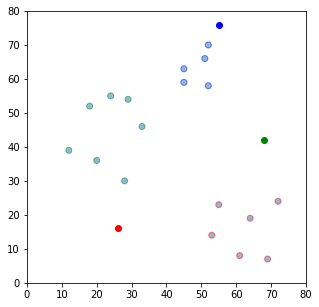

In [107]:
fig = plt.figure(figsize=(5,5))
colors= map(lambda x: colmap[x+1], labels)  #colmap ka reference upar se uthaya gya h   # nhi samjh aya iss line ka mtlb; shyd 
colors1=list(colors)
plt.scatter(df['x'], df['y'], alpha=0.5, edgecolor=colors1)

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroids[centroid], color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [72]:
np.random.randint(0,80)

45

In [90]:
colors1

['g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

In [91]:
labels

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])